In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from behavenet.fitting.utils import get_expt_dir
from behavenet.fitting.utils import get_best_model_version
from behavenet.fitting.utils import get_lab_example
from behavenet.fitting.utils import get_output_session_dir

results_dir = '/home/mattw/Dropbox/Dropbox/results/behavenet_figs_final/'
save_outputs = True

# Plot test losses as a function of latents

In [25]:
def get_test_data(lab, model_types, n_latents):

    metrics_df = []

    get_lab_example(hparams, lab)
    if lab == 'musall':
        hparams['animal'] = 'mSM36'
        hparams['session'] = 'all'
    
    for model_type in model_types:
        hparams['model_type'] = model_type
        for n_ae_latents in n_latents:
#             try:
            hparams['n_ae_latents'] = n_ae_latents
            hparams['session_dir'], sess_ids = get_output_session_dir(hparams)
            hparams['expt_dir'] = get_expt_dir(hparams)
            model_version = get_best_model_version(hparams['expt_dir'])
            print(hparams['expt_dir'])
#             print(model_version)
            metric_file = os.path.join(hparams['expt_dir'], model_version[0], 'metrics.csv')
            metrics = pd.read_csv(metric_file)
            for i, row in metrics.iterrows():
                metrics_df.append(pd.DataFrame({
                    'epoch': row['epoch'],
                    'loss': row['val_loss'],
                    'n_latents': n_ae_latents,
                    'dtype': 'val',
                    'model_type': model_type,
                    'data': lab
                }, index=[0]))
                metrics_df.append(pd.DataFrame({
                    'epoch': row['epoch'],
                    'loss': row['tr_loss'],
                    'n_latents': n_ae_latents,
                    'dtype': 'train',
                    'model_type': model_type,
                    'data': lab
                }, index=[0]))
                if 'test_loss' in row:
                    metrics_df.append(pd.DataFrame({
                        'epoch': row['epoch'],
                        'loss': row['test_loss'], #/normalizing_info[lab]['var'],
                        'n_latents': n_ae_latents,
                        'dtype': 'test',
                        'model_type': model_type,
                        'data': lab
                    }, index=[0]))
#             except:
#                 pass
    metrics_df = pd.concat(metrics_df)
    data_queried = metrics_df[metrics_df.dtype=='test']
    
    return data_queried

In [28]:
experiment_name = 'ae-dim-test'
model_types = ['conv', 'linear']
n_latents = [4, 8, 16, 32]

hparams = {
    'data_dir': '/media/mattw/data/',  # might be a different path than what is saved in hparams
    'tt_save_path': '/media/mattw/data/results/behavenet',
    'experiment_name': 'ae-dim-test',
    'model_class': 'ae'}

labs = ['musall', 'steinmetz', 'steinmetz-face']
dataset_names = ['WFCI', 'NP', 'NP-zoom']

data_queried = {}
example_images = {}
for lab in labs:
    data_queried[lab] = get_test_data(lab, model_types, n_latents)
    
    if lab == 'musall':
        hparams['session'] = 'all'
    
    example_images[lab] = {}
    for model_type in model_types:     
        hparams['model_type'] = model_type
        get_lab_example(hparams, lab)
        if lab == 'musall':
            hparams['animal'] = 'mSM36'
            hparams['session'] = 'all'
        
        model_cae, data_generator = get_best_model_and_data(hparams, AE, version='best')
        trial_idx = data_generator.datasets[0].batch_indxs['test'][2]
        
        orig_image = data_generator.datasets[0][trial_idx]['images']
        recon_output, _ = model_cae(orig_image)
        example_images[lab][model_type] = recon_output.cpu().detach().numpy()
        example_images[lab]['orig'] = orig_image.cpu().detach().numpy()
        
        if hparams['lab']=='musall':
            example_images[lab]['orig'] = np.transpose(example_images[lab]['orig'],(0,1,3,2))
            example_images[lab][model_type] = np.transpose(example_images[lab][model_type],(0,1,3,2))
        example_images[lab]['orig'] = np.concatenate([example_images[lab]['orig'][:,j] for j in range(example_images[lab]['orig'].shape[1])],axis=2)
        example_images[lab][model_type] = np.concatenate([example_images[lab][model_type][:,j] for j in range(example_images[lab][model_type].shape[1])],axis=2)
    

/media/mattw/data/results/behavenet/musall/vistrained/mSM36/multisession-00/ae/conv/04_latents/ae-dim-test
/media/mattw/data/results/behavenet/musall/vistrained/mSM36/multisession-00/ae/conv/08_latents/ae-dim-test
/media/mattw/data/results/behavenet/musall/vistrained/mSM36/multisession-00/ae/conv/16_latents/ae-dim-test
/media/mattw/data/results/behavenet/musall/vistrained/mSM36/multisession-00/ae/conv/32_latents/ae-dim-test
/media/mattw/data/results/behavenet/musall/vistrained/mSM36/multisession-00/ae/linear/04_latents/ae-dim-test
/media/mattw/data/results/behavenet/musall/vistrained/mSM36/multisession-00/ae/linear/08_latents/ae-dim-test
/media/mattw/data/results/behavenet/musall/vistrained/mSM36/multisession-00/ae/linear/16_latents/ae-dim-test
/media/mattw/data/results/behavenet/musall/vistrained/mSM36/multisession-00/ae/linear/32_latents/ae-dim-test
Loading model defined in /media/mattw/data/results/behavenet/musall/vistrained/mSM36/multisession-00/ae/conv/08_latents/ae-dim-test/vers

In [29]:
import matplotlib
FONT_SIZE = 22
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': FONT_SIZE})
#matplotlib.rcParams['font.family'] = 'sans-serif'
#matplotlib.rcParams['font.sans-serif'] = ['Myriad Pro']
plt.rcParams["font.family"] = "Times New Roman"

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title

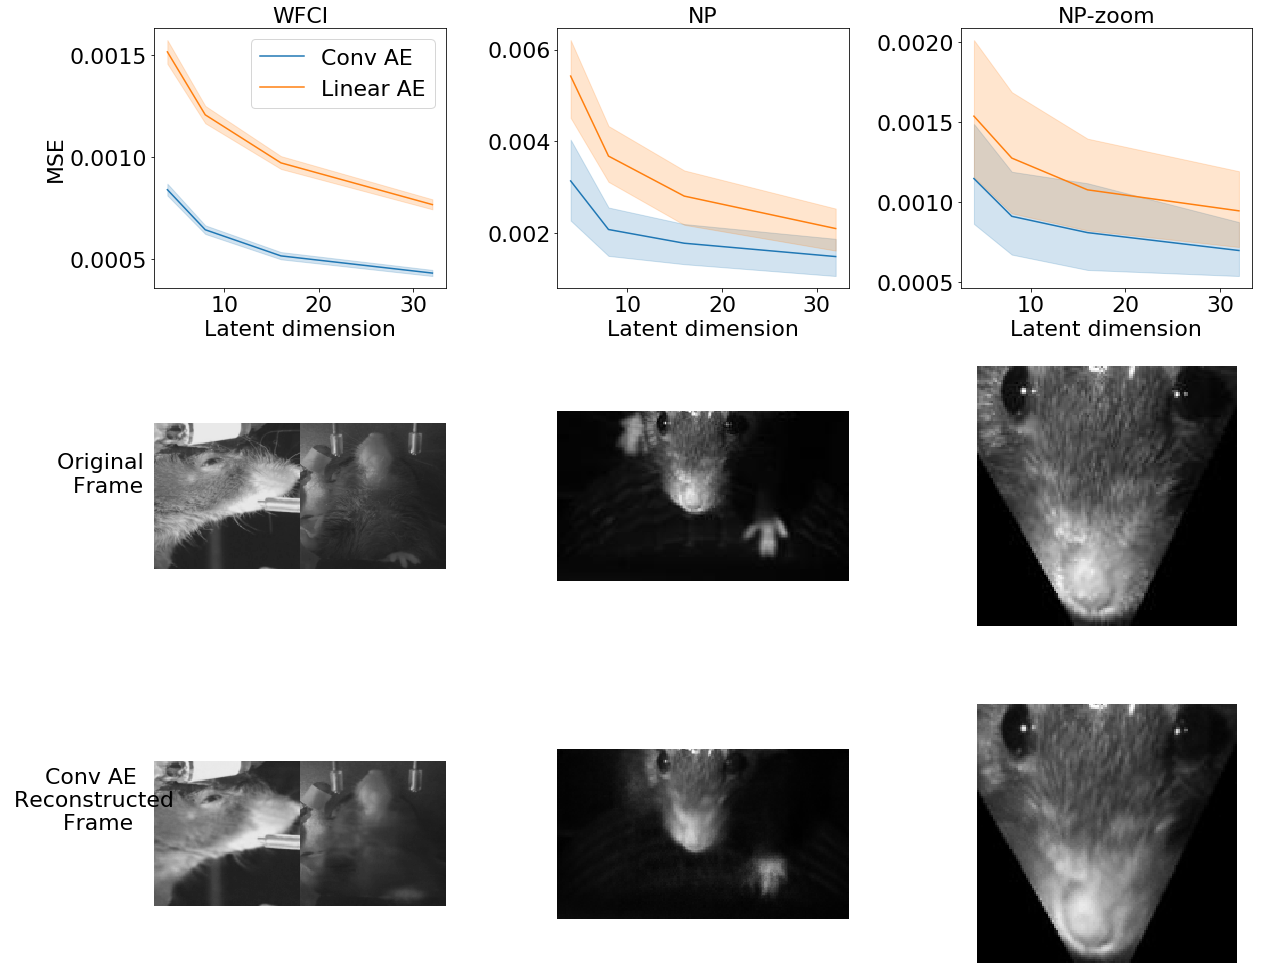

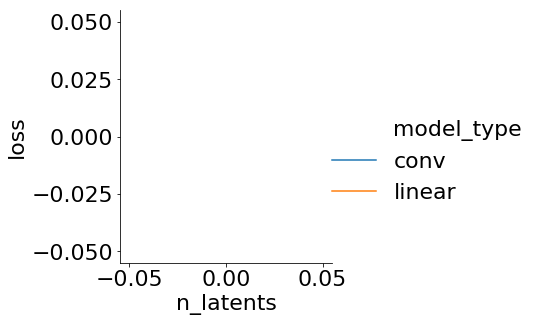

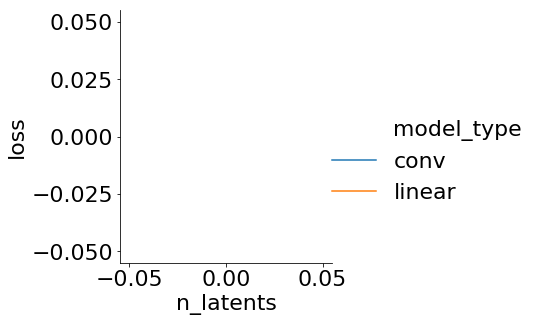

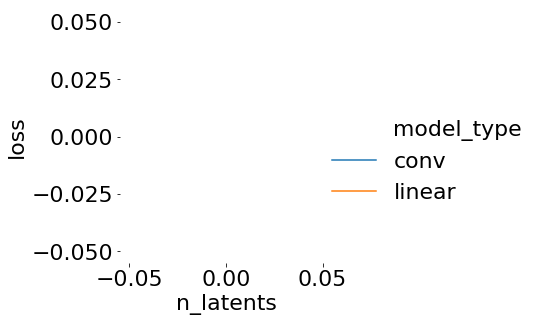

In [31]:
### Make figure 1

y_axis = 'loss' # 'test_loss' | 'test_r2'
plot_type = 'line'
hue = 'model_type'
x_axis = 'n_latents' # 'layers' | 'layer_size' | 'pred' | 'lags'


fig, axes = plt.subplots(3, 3, figsize=(18, 14))

for i_ax in range(3):
    sns.relplot(x=x_axis, y=y_axis, hue=hue, kind=plot_type, data=data_queried[labs[i_ax]],ax=axes[0][i_ax])
    axes[0][i_ax].set_title(dataset_names[i_ax])
    axes[0][i_ax].set_xlabel('Latent dimension')
    axes[0][i_ax].set_ylabel('')
    
axes[0][0].legend(['Conv AE','Linear AE'])

axes[0][0].set_ylabel('MSE')
i_frame=20
for i_ax in range(3):
    axes[1][i_ax].imshow(example_images[labs[i_ax]]['orig'][i_frame],vmin=0,vmax=1,cmap='gray')
    if labs[i_ax]=='datta':
        axes[1][i_ax].imshow(example_images[labs[i_ax]]['orig'][i_frame]*example_images[labs[i_ax]]['mask'][i_frame][0],vmin=0,vmax=1,cmap='gray',interpolation='none')
    
    [s.set_visible(False) for s in axes[1][i_ax].spines.values()]    
    axes[1][i_ax].set_xticks([])
    axes[1][i_ax].set_yticks([])
    
for i_ax in range(3):
    axes[2][i_ax].imshow(example_images[labs[i_ax]]['conv'][i_frame],vmin=0,vmax=1,cmap='gray',interpolation='none')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
    [s.set_visible(False) for s in axes[2][i_ax].spines.values()]
    axes[2][i_ax].set_xticks([])
    axes[2][i_ax].set_yticks([])
    
# for i_ax in range(4):
#     axes[3][i_ax].imshow(example_images[labs[i_ax]]['linear'][120],vmin=0,vmax=1,cmap='gray')
#     axes[3][i_ax].set_xticks([])
#     axes[3][i_ax].set_yticks([])

axes[1][0].set_ylabel('Original \n Frame',rotation=0, labelpad=50)
axes[2][0].set_ylabel('Conv AE \n Reconstructed \n Frame',rotation=0, labelpad=60)
fig.tight_layout()
fig.savefig(os.path.join(results_dir, 'all_ae', 'all_ae_fig.pdf'), transparent=True)